In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sympy import Point,Line

In [3]:
data = pd.read_csv('~/DataSet3/1.csv')
data.head()

,0,1502,2215,2153,1
0,1.0,1667,2072,2047,1
1,2.0,1611,1957,1906,1
2,3.0,1601,1939,1831,1
3,4.0,1643,1965,1879,1
4,5.0,1604,1959,1921,1


In [4]:
data1=data.iloc[:,1:4]
labels = data.iloc[:,-1]
data1.head()

,1502,2215,2153
0,1667,2072,2047
1,1611,1957,1906
2,1601,1939,1831
3,1643,1965,1879
4,1604,1959,1921


**Scalling data to normalize the effect of each dimention and also reduce effect of outliers**

In [5]:
scaler = StandardScaler()
sample_transformed=scaler.fit_transform(data1)
print(scaler.mean_)

[1910.67337231 2380.28738462 2041.21414154]


**Elbow Implimentation with kmeans score()**
*i.e Sum of distances of samples to their closest cluster center*

In [17]:
kmeans_score=[]
slope1=[]
sse=[]
K = range(2,11)
for k in K :
    kmeansModel1 = KMeans(n_clusters=k)
    labels=kmeansModel1.fit_predict(sample_transformed)
    centers = kmeansModel1.cluster_centers_
    #print(len(centers))
    #print(kmeansModel1.labels_)
    kmeans_score.append(kmeansModel1.score(sample_transformed))
    #print(kmeans_score)
    #sample_transformed = kmeansModel1.transform(sample)
    #print(sample_transformed)
    #Calculate slope of each line
    if k>2:
        s= (kmeans_score[-2]-kmeans_score[-1])
        slope1.append([k,s])

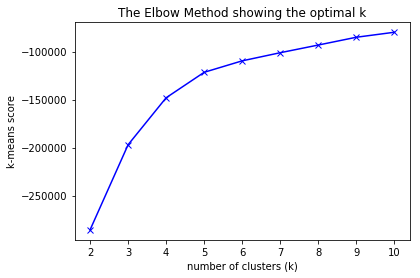

In [18]:
plt.plot(K,kmeans_score,'bx-')
plt.xlabel('number of clusters (k)')
plt.ylabel('k-means score')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [19]:
slope1

[[3, -88720.14866687474],
 [4, -48961.172031121474],
 [5, -26530.847295125393],
 [6, -11941.469273291485],
 [7, -8465.631894660692],
 [8, -7995.068028901427],
 [9, -8111.372019891045],
 [10, -5205.857324647572]]

In [20]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope1[a])[-1] - (slope1[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope1[a][0])-1))

Optimal Number of Clusters = 7


In [21]:
distances=[]
for i in range(0,9):
    p1=Point(2,kmeans_score[0])
    p2=Point(10,kmeans_score[8])
    l1 = Line(p1,p2)
    p=Point(i+2,kmeans_score[i])
    l2=l1.perpendicular_segment(p)
    distances.append(l2.length)
index=distances.index(np.max(distances))
print('Optimal number 0f clusters = '+str(index+2))

Optimal number 0f clusters = 5
